In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
df = pd.get_dummies(df, drop_first=True)
df.isna().sum().sort_values()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_Yes      0
dtype: int64

In [3]:
#Hallar los valores únicos presentes en las columnas
columns = df.columns
for col in columns:
    print(f"Categorías en {col}: {df[col].unique()}")
df.describe()

Categorías en Hours Studied: [7 4 8 5 3 6 2 1 9]
Categorías en Previous Scores: [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Categorías en Sleep Hours: [9 4 7 5 8 6]
Categorías en Sample Question Papers Practiced: [1 2 5 6 0 8 3 4 9 7]
Categorías en Performance Index: [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]
Categorías en Extracurricular Activities_Yes: [ True False]


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-5-2867eac5f4de>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


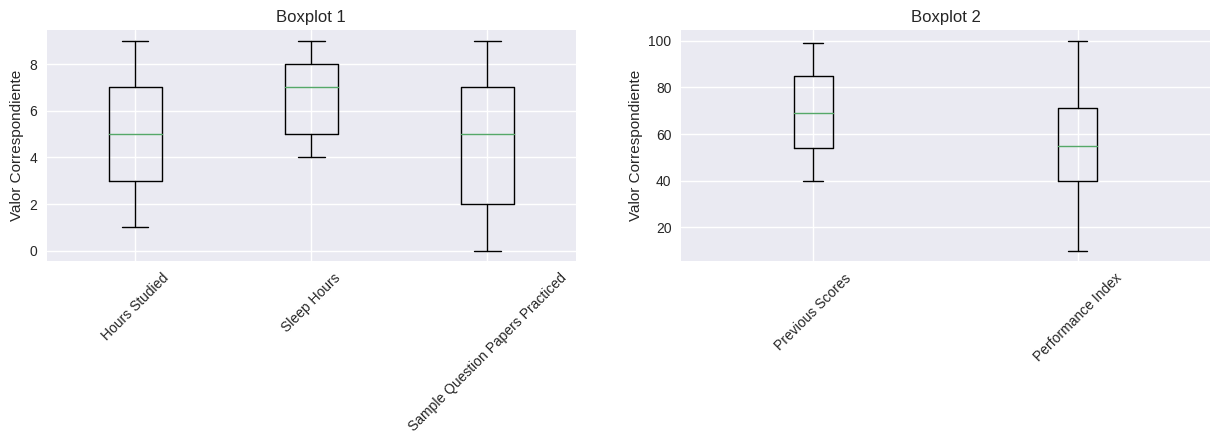

In [5]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].set_title("Boxplot 1")
ax[0].boxplot([df["Hours Studied"],df["Sleep Hours"],df['Sample Question Papers Practiced']])
ax[0].set_xticklabels(["Hours Studied","Sleep Hours","Sample Question Papers Practiced"],rotation=45)
ax[0].set_ylabel("Valor Correspondiente")
ax[1].set_title("Boxplot 2")
ax[1].boxplot([df["Previous Scores"],df["Performance Index"]])
ax[1].set_xticklabels(["Previous Scores","Performance Index"],rotation=45)
ax[1].set_ylabel("Valor Correspondiente")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

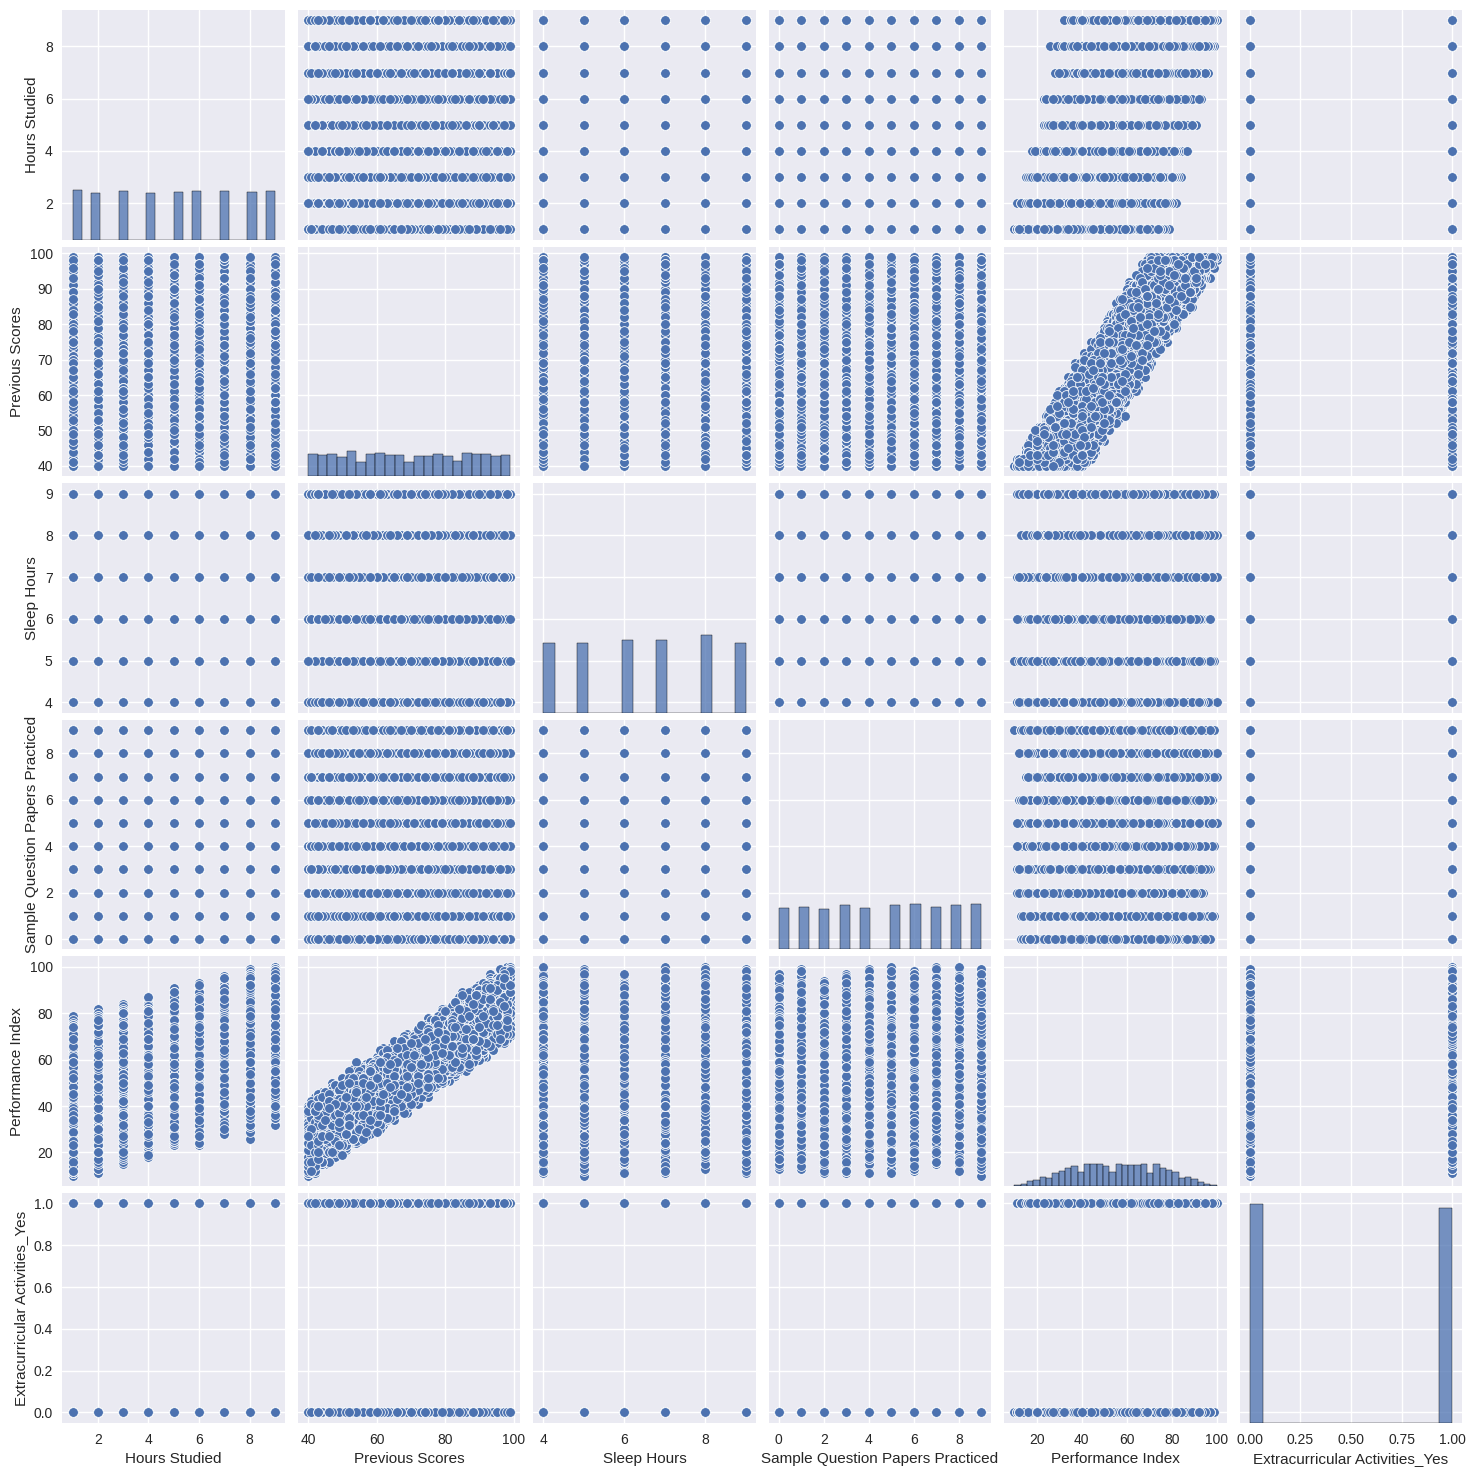

In [6]:
sns.pairplot(df)

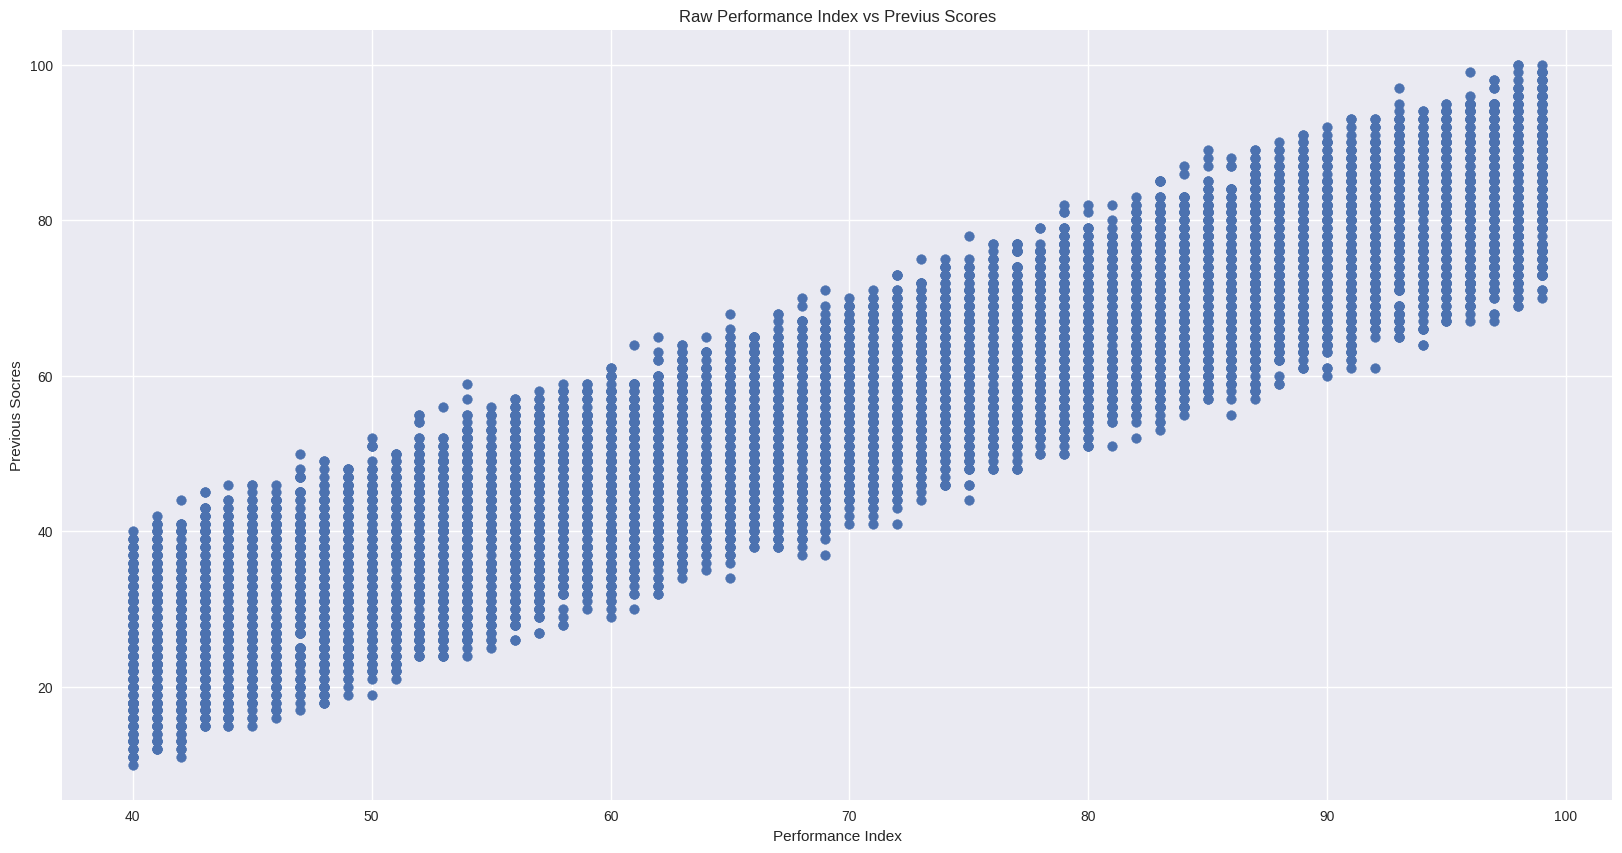

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['Previous Scores'],df['Performance Index'])
ax.set_xlabel('Performance Index')
ax.set_ylabel('Previous Socres')
ax.set_title("Raw Performance Index vs Previus Scores")
plt.show()


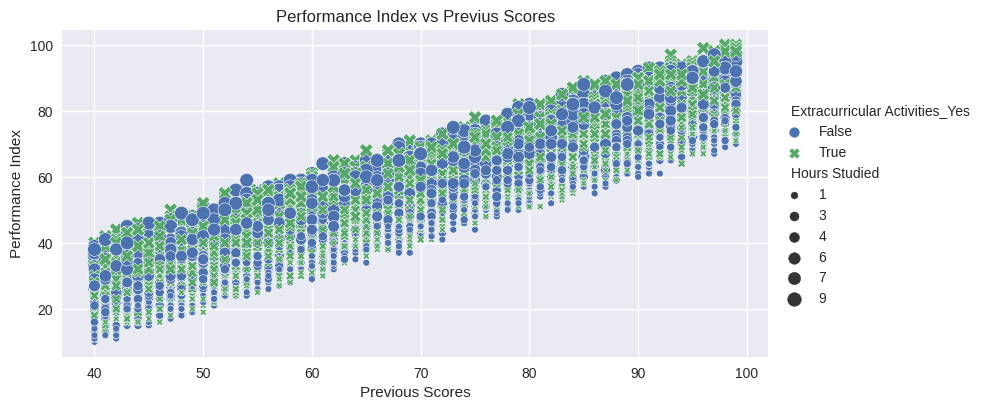

In [8]:
sns.relplot(x="Previous Scores",
            y="Performance Index",
            data=df,kind="scatter",
            hue="Extracurricular Activities_Yes",
            style="Extracurricular Activities_Yes",
           height=4,aspect=2,size="Hours Studied")
plt.title("Performance Index vs Previus Scores")
plt.show()

In [9]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False


In [10]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df = pd.get_dummies(df, drop_first=True)

X = df.drop(['Performance Index'], axis=1).values
y = df['Performance Index'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_num = X_train[:,:4]
X_train_cat = X_train[:,-1].reshape(-1,1)
X_test_num = X_test[:,:4]
X_test_cat = X_test[:,-1].reshape(-1,1)

scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train = np.hstack([X_train_num_scaled,X_train_cat])
X_test = np.hstack([X_test_num_scaled,X_test_cat])


lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

kf = KFold(n_splits=5, shuffle=True, random_state=41)

scores = cross_val_score(lreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Definir la grilla
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
# Usamos GridSearch
lreg_cv = GridSearchCV(lreg, param_grid, cv=kf)
lreg_cv.fit(X_train,y_train)
print("---"*30)
print("Cross-validation MSE scores:", -scores)  # Se utiliza el signo negativo porque sklearn devuelve los valores negativos para MSE
print("---"*30)
print("Mean cross-validation MSE:", -scores.mean())
print("---"*30)
print("r2: ",r2_score(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("---"*30)
print("Mejores parámetros",lreg_cv.best_params_,"\nMejor Score con CV", lreg_cv.best_score_)
print("R² promedio CV con mejores parámetros",lreg_cv.score(X_test,y_test))
print("---"*30)
#Si deseamos saber la importancia o el peso que tiene cada variable
print("Feature importance: ")
coef_names = df.drop(['Performance Index'], axis=1).columns
for name, coef in zip(coef_names, lreg.coef_):
    print(f"{name}: {coef:.4f}")  

------------------------------------------------------------------------------------------
Cross-validation MSE scores: [4.12686709 4.33803691 3.97457896 4.33160677 4.23648443]
------------------------------------------------------------------------------------------
Mean cross-validation MSE: 4.20151483248398
------------------------------------------------------------------------------------------
r2:  0.9890110607021136
MSE:  4.066563824092686
RMSE : 2.016572295776347
------------------------------------------------------------------------------------------
Mejores parámetros {'fit_intercept': True, 'positive': True} 
Mejor Score con CV 0.9885883814008958
R² promedio CV con mejores parámetros 0.9890110607021136
------------------------------------------------------------------------------------------
Feature importance: 
Hours Studied: 7.4228
Previous Scores: 17.6083
Sleep Hours: 0.8139
Sample Question Papers Practiced: 0.5460
Extracurricular Activities_Yes: 0.5817


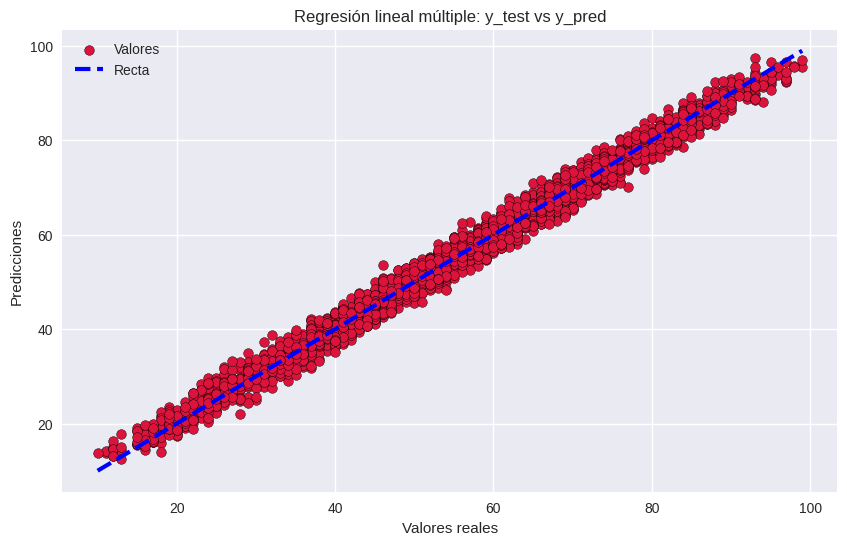

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='crimson', edgecolors='black', label='Valores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', linewidth=3, label = 'Recta')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión lineal múltiple: y_test vs y_pred')
plt.legend()
plt.grid(True)
plt.show()
